In [75]:
#import packages
#part 1
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [76]:
#read S&P 500 data
start_date = "2000-01-01"
end_date = "2019-09-30"

sp500 = pdr.DataReader('SPY', 'yahoo', start_date, end_date)
sp500_adj_close = sp500['Adj Close']
df_sp500 = pd.DataFrame(sp500_adj_close)
df_sp500.columns = ['SP500']
df_sp500.reset_index(inplace = True,drop = False)
df_sp500

,Date,SP500
0,2000-01-03,100.470520
1,2000-01-04,96.541473
2,2000-01-05,96.714218
3,2000-01-06,95.159882
4,2000-01-07,100.686371
...,...,...
4963,2019-09-25,297.619995
4964,2019-09-26,297.000000
4965,2019-09-27,295.399994
4966,2019-09-30,296.769989


In [77]:
#read truck tonnage data
data_path_truck_tonnage = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=TRUCKD11&scale=left&cosd=2000-01-01&coed=2019-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-11-17&revision_date=2019-11-17&nd=2000-01-01"
df_truck_tonnage = pd.read_csv(data_path_truck_tonnage)
df_truck_tonnage

,DATE,TRUCKD11
0,2000-01-01,80.2
1,2000-02-01,79.7
2,2000-03-01,74.1
3,2000-04-01,72.8
4,2000-05-01,73.0
...,...,...
232,2019-05-01,117.5
233,2019-06-01,118.0
234,2019-07-01,118.9
235,2019-08-01,120.0


In [79]:
print(df_truck_tonnage.isnull().sum())
#no missing or null value was detected

DATE        0
TRUCKD11    0
dtype: int64


In [80]:
print(df_sp500.isnull().sum())
#no missing or null value was detected

Date     0
SP500    0
dtype: int64


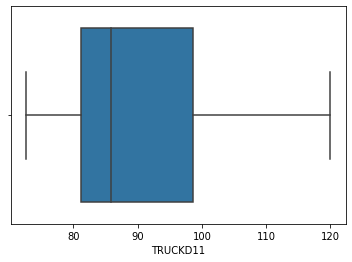

In [81]:
import seaborn as sns
sns.boxplot(x = df_truck_tonnage['TRUCKD11'])
#no outlier was detected

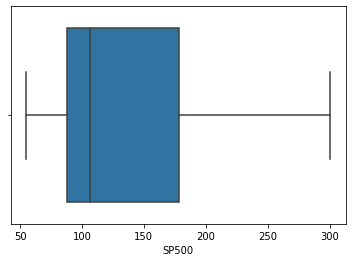

In [82]:
sns.boxplot(x = df_sp500['SP500'])
#no outlier was detected

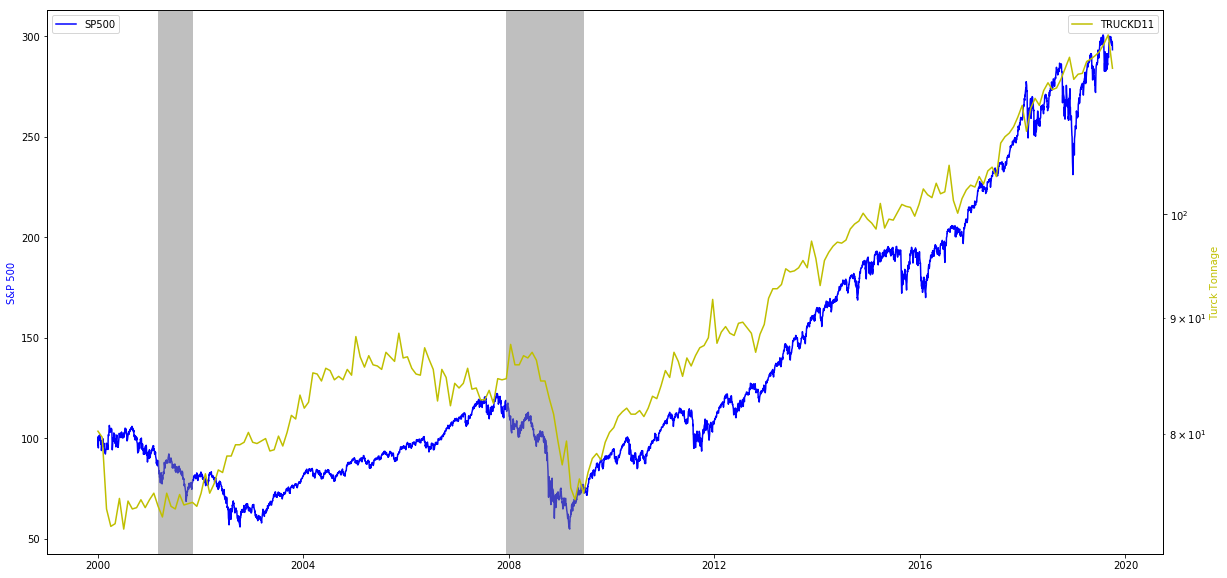

In [83]:
#after cleaning the dataset
#plot the data
import matplotlib.pyplot as plt
x_sp = df_sp500['Date']
y_sp = df_sp500['SP500']

figure = plt.figure(figsize=(20,10))
ax1 = figure.add_subplot(1, 1, 1)

ax1.plot(x_sp, y_sp, 'b', label = 'SP500')
ax1.legend(loc = 2)
ax1.set_ylabel('S&P 500', color = 'b')
    
ax2 = ax1.twiny().twinx()
x_tt = df_truck_tonnage['DATE']
y_tt = df_truck_tonnage['TRUCKD11']
ax2.plot(x_tt, y_tt, 'y', label = 'TRUCKD11')
ax2.legend(loc = 1)
ax2.set_yscale('log')
ax2.set_ylabel('Turck Tonnage', color = 'y')
ax2.get_xaxis().set_ticks([])

#shade areas that contain recessions
recession_date = [['2001-03-01', '2001-11-01'],
                  ['2007-12-01', '2009-06-01']]

for i in recession_date:
    ax2.axvspan(i[0], i[1], facecolor='grey', alpha=0.5)

#from the plot, the relationship between truck tonnage and S&P 500 is positively related.

In [84]:
#part 2
#retrieve S&P500 data
start_date2 = "1995-03-17"
end_date2 = "2019-10-31"

sp500_2 = pdr.DataReader('SPY', 'yahoo', start_date2, end_date2)
sp500_2_adj_close = sp500_2['Adj Close']
df_sp500_2 = pd.DataFrame(sp500_2_adj_close)
df_sp500_2.columns = ['SP500']
df_sp500_2.reset_index(inplace = True,drop = False)
df_sp500_2

,Date,SP500
0,1995-03-17,31.732058
1,1995-03-20,31.732058
2,1995-03-21,31.652044
3,1995-03-22,31.682041
4,1995-03-23,31.702032
...,...,...
6197,2019-10-28,303.299988
6198,2019-10-29,303.209991
6199,2019-10-30,304.140015
6200,2019-10-31,303.329987


In [85]:
print(df_sp500_2.isnull().sum())

Date     0
SP500    0
dtype: int64


In [86]:
#sma
df_sp500_2['sma_20day'] = df_sp500_2.iloc[:, 1]. rolling(20).mean()
df_sp500_2

df_sp500_2['sma_100day'] = df_sp500_2.iloc[:, 1]. rolling(100).mean()
df_sp500_2

df_sp500_2['sma_200day'] = df_sp500_2.iloc[:, 1]. rolling(200).mean()
df_sp500_2 = df_sp500_2.loc[199:]
df_sp500_2

,Date,SP500,sma_20day,sma_100day,sma_200day
199,1995-12-29,40.053585,40.041328,38.099352,36.102165
200,1996-01-02,40.481094,40.091194,38.142917,36.145911
201,1996-01-03,40.593056,40.122379,38.188407,36.190216
202,1996-01-04,40.206276,40.121075,38.232041,36.232987
203,1996-01-05,40.124836,40.111147,38.271642,36.275201
...,...,...,...,...,...
6197,2019-10-28,303.299988,296.154999,293.775358,285.435519
6198,2019-10-29,303.209991,296.653499,293.958040,285.682276
6199,2019-10-30,304.140015,297.457500,294.136945,285.919137
6200,2019-10-31,303.329987,298.102998,294.308444,286.148841


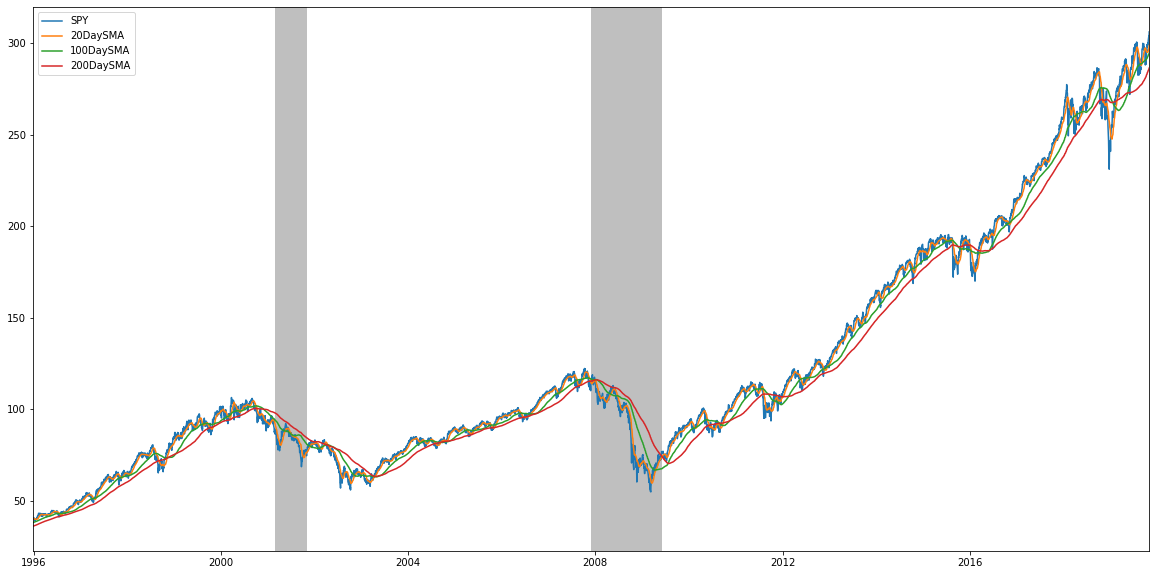

In [88]:
#plot sma

figure_2 = plt.figure(figsize=(20,10))
ax = figure_2.add_subplot(1, 1, 1)

plt.margins(x = 0)

x = df_sp500_2['Date']
y_sp500 = df_sp500_2['SP500']
y_sma_20 = df_sp500_2['sma_20day']
y_sma_100 = df_sp500_2['sma_100day']
y_sma_200 = df_sp500_2['sma_200day']

ax.plot(x, y_sp500, label = 'SPY')
ax.plot(x, y_sma_20, label = '20DaySMA')
ax.plot(x, y_sma_100, label = '100DaySMA')
ax.plot(x, y_sma_200, label = '200DaySMA')

ax.legend(loc = 2)


#shade areas that contain recessions
recession_date_2 = [['2001-03-01', '2001-11-01'],
                  ['2007-12-01', '2009-06-01']]

for i in recession_date_2:
    ax.axvspan(i[0], i[1], facecolor='grey', alpha=0.5)
    
#From the graph below, 20 days and 100 days SMA fit more to the stock price than 200 days SMA. 
#Stock market direction is largely based on whether the S&P 500 Index is above/below the 200 Day Simple Moving Average.
#It was said when the price above 200daySMA, it is a bullish market; when the price below 200daySMA, it is a bearish.
#As a result, in the recession period(grey area), the price is below 200daySMA.

In [89]:
#part 3
#I assert "Direxion Daily Gold Miners Bull 3X Shrs"(an gold price index stock) is inversely propertional to "S&P 500".
#read gold index price data
start_date3 = "2011-01-01"
end_date3 = "2019-09-30"

gold_index_price = pdr.DataReader('NUGT', 'yahoo', start_date3, end_date3)

gold_index_price_adj_close = gold_index_price['Adj Close']
gold_index_price = pd.DataFrame(gold_index_price_adj_close)
gold_index_price.columns = ['NUGT']
gold_index_price.reset_index(inplace = True,drop = False)
gold_index_price

,Date,NUGT
0,2011-01-03,14590.583008
1,2011-01-04,13778.086914
2,2011-01-05,13427.150391
3,2011-01-06,12736.721680
4,2011-01-07,12732.907227
...,...,...
2196,2019-09-25,33.820000
2197,2019-09-26,32.660000
2198,2019-09-27,30.340000
2199,2019-09-30,27.860001


In [90]:
#read S&P 500 data
sp500_3 = pdr.DataReader('SPY', 'yahoo', start_date3, end_date3)
sp500_adj_close_3 = sp500_3['Adj Close']
df_sp500_3 = pd.DataFrame(sp500_adj_close_3)
df_sp500_3.columns = ['SP500_3']
df_sp500_3.reset_index(inplace = True,drop = False)
df_sp500_3

,Date,SP500_3
0,2011-01-03,106.585152
1,2011-01-04,106.526436
2,2011-01-05,107.080132
3,2011-01-06,106.870377
4,2011-01-07,106.660645
...,...,...
2196,2019-09-25,297.619995
2197,2019-09-26,297.000000
2198,2019-09-27,295.399994
2199,2019-09-30,296.769989


[]

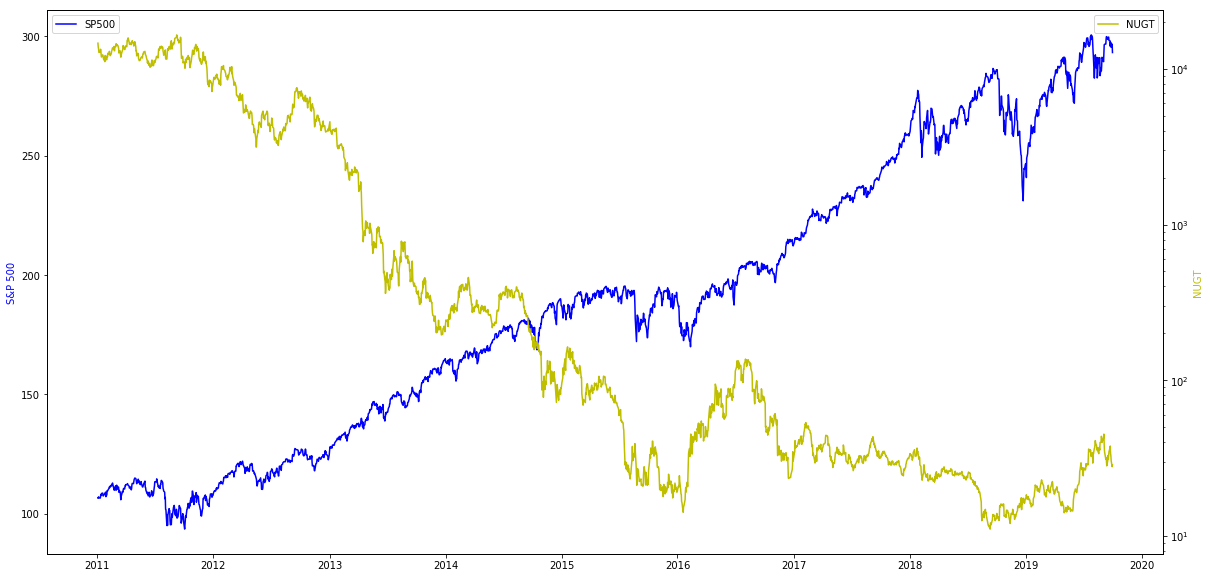

In [91]:
#plot the data
x_sp_3 = df_sp500_3['Date']
y_sp_3 = df_sp500_3['SP500_3']

figure = plt.figure(figsize=(20,10))
axp = figure.add_subplot(1, 1, 1)

axp.plot(x_sp_3, y_sp_3, 'b', label = 'SP500')
axp.legend(loc = 2)
axp.set_ylabel('S&P 500', color = 'b')
    
axg = axp.twiny().twinx()
x_g = gold_index_price['Date']
y_g = gold_index_price['NUGT']
axg.plot(x_g, y_g, 'y', label = 'NUGT')
axg.legend(loc = 1)
axg.set_yscale('log')
axg.set_ylabel('NUGT', color = 'y')
axg.get_xaxis().set_ticks([])

#from the plot, the relationship between gold index price and S&P 500 is negatively related.